### Lead Time  Distribution in Reservation
 1. Does booking lead time affect whether a reservation is cancelled?
 2. Does lead time predict cancellation risk for different customer type?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/USER/Desktop/Abbie's World/My project/1_Hotel Booking Demand Project/1_with_Excel/hotel_booking_cleaned.csv")

In [ ]:
# data cleaning and preprocessing
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

# Removing entries with negative adr
df= df[df['adr'] >= 0]

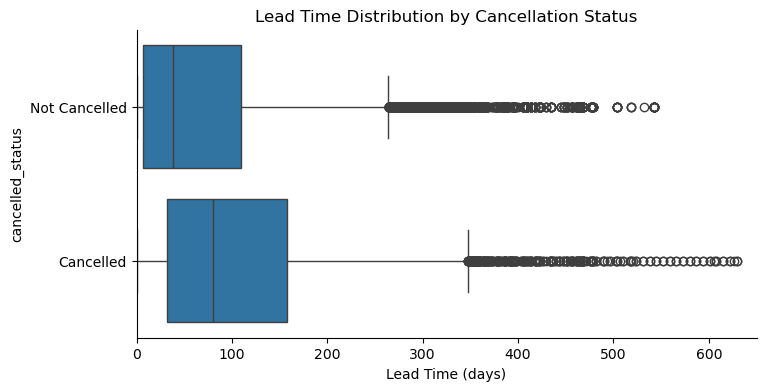

In [8]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x='lead_time',
    y='cancelled_status',
    data=df,
)
sns.despine()
plt.title('Lead Time Distribution by Cancellation Status')

plt.xlabel('Lead Time (days)')
plt.xlim(0,650)
plt.show()

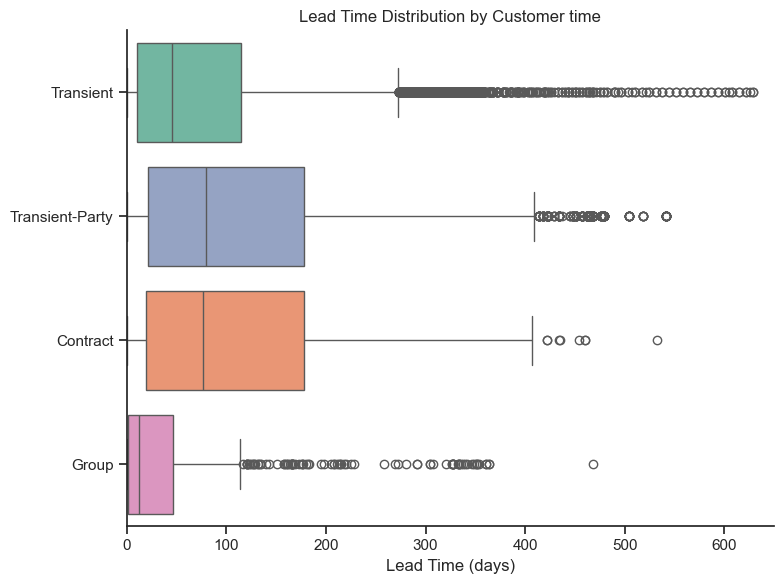

In [9]:
customer_order = df['customer_type'].value_counts(ascending=False).index

plt.figure(figsize=(8,6))
sns.set_theme(style='ticks')

sns.boxplot(data=df, y='customer_type', x='lead_time', order=customer_order, hue='customer_type', palette='Set2')
sns.despine()

plt.title('Lead Time Distribution by Customer time')
plt.xlim(0, 650)
plt.xlabel('Lead Time (days)')
plt.ylabel('')

plt.tight_layout()
plt.show()


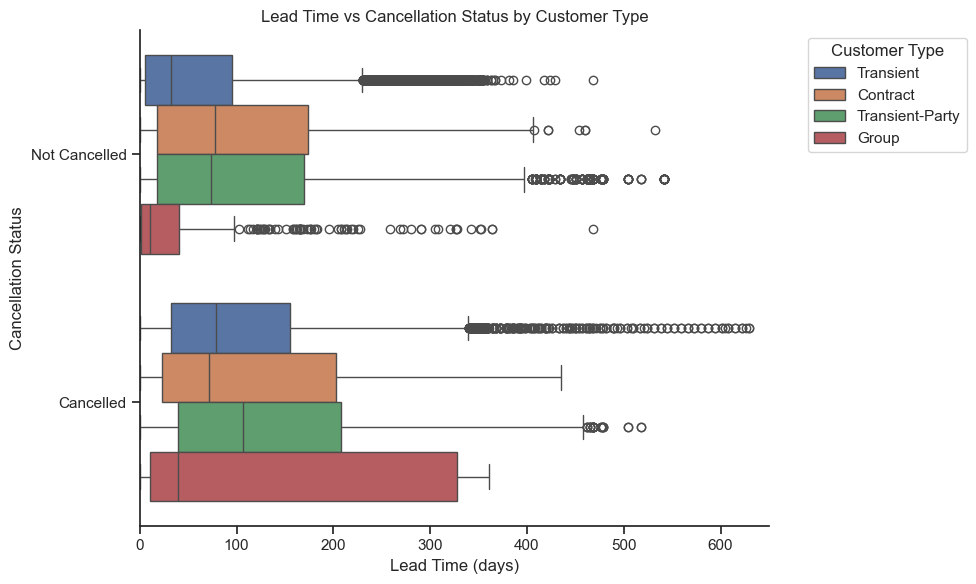

In [13]:
plt.figure(figsize=(10,6))

sns.boxplot(
    data=df,
    x='lead_time',
    y='cancelled_status',
    hue='customer_type'
)

plt.title('Lead Time vs Cancellation Status by Customer Type')
plt.xlabel('Lead Time (days)')
plt.ylabel('Cancellation Status')
plt.legend(title='Customer Type', bbox_to_anchor=(1.05,1), loc='upper left')
sns.despine()
plt.xlim(0,650)
plt.tight_layout()
plt.show()


In [11]:
df.groupby(['customer_type','cancelled_status'])['lead_time'].describe()

count        mean         std  min    25%  \
customer_type   cancelled_status                                                
Contract        Cancelled           512.0  118.326172  113.163620  0.0  23.00   
                Not Cancelled      2627.0  107.451466  101.557206  0.0  18.00   
Group           Cancelled            54.0  130.500000  148.720042  0.0  10.25   
                Not Cancelled       490.0   42.887755   74.638691  0.0   1.00   
Transient       Cancelled         21672.0  103.022933   88.665838  0.0  32.00   
                Not Cancelled     50314.0   60.679334   70.797551  0.0   5.00   
Transient-Party Cancelled          1787.0  134.058198  113.492243  0.0  39.00   
                Not Cancelled      9940.0  109.252616  108.283543  0.0  18.00   

                                    50%    75%    max  
customer_type   cancelled_status                       
Contract        Cancelled          72.0  202.5  435.0  
                Not Cancelled      78.0  173.5  532.0  
Group           Cancelled          39.0  328.0  361.0  
                Not Cancelled      11.0   41.0  468.0  
Transient       Cancelled          79.0  155.0  629.0  
                Not Cancelled      32.0   95.0  737.0  
Transient-Party Cancelled         107.0  208.0  518.0  
                Not Cancelled      74.0  170.0  542.0